In [9]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import random
from sklearn.utils import shuffle
%matplotlib inline

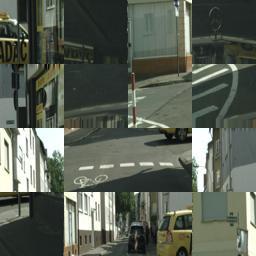

In [19]:
filepath = "./archive/val/1.jpg"
img = Image.open(filepath)
  
# get width and height
width,height = img.size
split_width = int(width / 2) # split into image/solution
nw = 4 # number of tiles to divide width (horizontally)
nh = 4 # number of tiles to divide height (vertically)
tile_width = split_width/nw
tile_height = height/nh

img_tiles = []
sol_tiles = []
for side in range(2):
    width_offset = side * split_width
    tiles = img_tiles if side == 0 else sol_tiles
    for i in range(nw):
        for j in range(nh):
            left = tile_width*i + width_offset
            right = tile_width*(i+1) + width_offset
            top =  tile_height*j
            bottom = tile_height*(j+1)
            
            im1 = img.crop((left, top, right, bottom))
            tiles.append(im1)

imgs_shuffled, sol_shuffled = shuffle(img_tiles, sol_tiles)

sol_output = Image.new('RGB', (split_width, height))
img_output = Image.new('RGB', (split_width, height))

for side in range(2):
    tiles = imgs_shuffled if side == 0 else sol_shuffled
    output = img_output if side == 0 else sol_output
    idx = 0 # index tiles
    for i in range(nw):
        for j in range(nh):
            width_paste = int(tile_width*i)
            height_paste = int(tile_height*j)
            output.paste(tiles[idx], (width_paste, height_paste))
            idx += 1

display(img_output)
img_output.save('./outputs/1.jpg')
sol_output.save('./outputs/1_sol.jpg')


    

In [18]:
(split_width, height)

(256.0, 256)